<a href="https://colab.research.google.com/github/angad68/deepLearning-CatvsDog/blob/main/deep_learning_dogvCat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"angursingh","key":"fc6ebd9cbef1db1f2082ef84e09f1d6a"}'}

In [ ]:
import os
import shutil

# Make the config directory if it doesn't exist
os.makedirs("/root/.config/kaggle", exist_ok=True)

# Move the file to the right place
shutil.move("kaggle.json", "/root/.config/kaggle/kaggle.json")


'/root/.config/kaggle/kaggle.json'

In [ ]:
import kaggle
kaggle.api.authenticate()
kaggle.api.dataset_download_files('salader/dogs-vs-cats', path='.', unzip=True)


Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats


In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout


In [ ]:
train_ds=keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)

)

validation_ds=keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)

)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [ ]:
#normaliztion

def process(image,label):
  image=tf.cast(image/255., tf.float32)
  return image,label

  train_ds=train_ds.map(process)
  validation_ds=validation_ds.map(process)

In [ ]:
#create CNN model
model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))


model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='sigmoid'))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    14,745,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,847,297 (56.64 MB)

 Trainable params: 14,847,297 (56.64 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history=model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 55s 75ms/step - accuracy: 0.5616 - loss: 12.7030 - val_accuracy: 0.6476 - val_loss: 0.6404
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 42s 67ms/step - accuracy: 0.6712 - loss: 0.6178 - val_accuracy: 0.6666 - val_loss: 0.6292
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 41s 66ms/step - accuracy: 0.7396 - loss: 0.5137 - val_accuracy: 0.6714 - val_loss: 0.7310
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 83s 67ms/step - accuracy: 0.8142 - loss: 0.3943 - val_accuracy: 0.6418 - val_loss: 1.1765
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 86s 74ms/step - accuracy: 0.8557 - loss: 0.3265 - val_accuracy: 0.6262 - val_loss: 1.2571
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 74ms/step - accuracy: 0.7996 - loss: 0.4765 - val_accuracy: 0.6432 - val_loss: 1.3182
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 77s 67ms/step - accuracy: 0.9094 - loss: 0.2297 - val_accuracy: 0.6306 - val_loss: 1.4785
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 84s 70ms/step - accuracy: 0.9509 - loss: 0.1379 -

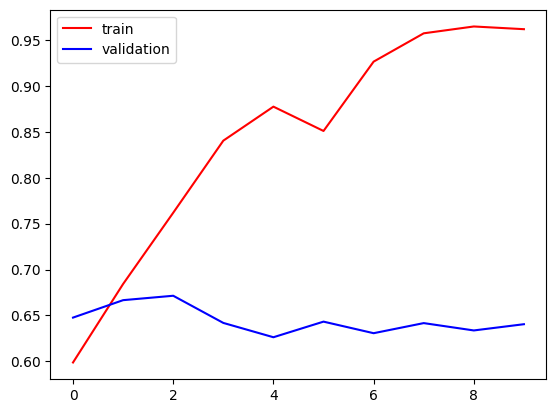

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()


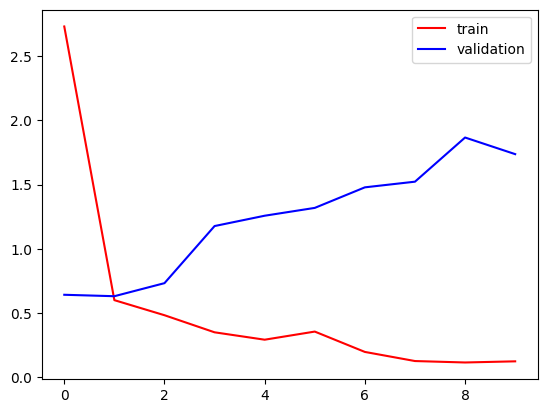

In [ ]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [ ]:
import cv2

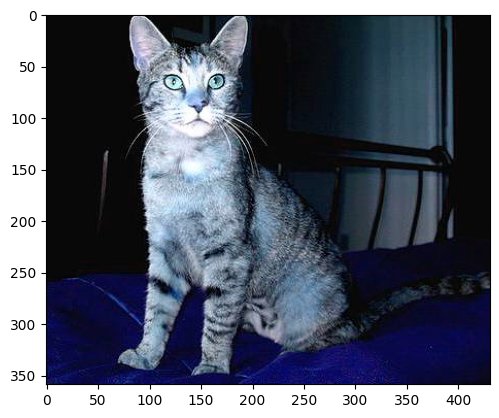

In [ ]:
test_img=cv2.imread('/content/test/cats/cat.10000.jpg')
plt.imshow(test_img)

In [ ]:
test_img=cv2.resize(test_img,(256,256))

In [ ]:
test_input=test_img.reshape((1,256,256,3))

In [ ]:
model.predict(test_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 973ms/step


array([[0.992897]], dtype=float32)